In [1]:
# Ch9 텍스트를 위한 인공 신경망

In [ ]:
# 9-1 순차 데이터와 순환 신경망

In [2]:
# 순차 데이터 : 텍스트같이 순서에 의미가 있는 데이터
# 이러한 데이터는 순서르 지켜서 입력해주어야 하고, 이전에 입력한 데이터를 기억하는 기능이 필요함.

In [3]:
# 피드포워드 신경망(feedforward neural network) : 데이터의 흐름이 앞으로만 전달되는 신경망
# 순환 신경망(recurrent neural network) : 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하므로, 이전 데이터가 신경망 층에 순환되는 신경망
# 순환되는 과정을 타임스텝이라고 하는데, 타임스텝이 오래될수록 순환되는 정보는 희미해짐

In [4]:
# 일반적으로 은닉층의 활성화함수로는 tanh를 씀.

In [5]:
# 9-2 순환 신경망으로 IMDB 리뷰 분류하기

In [6]:
# 영어에서 단어를 토큰이라고 함. 토큰에 정수를 할당하는 방식.
# 정수 중 몇 개는 특정한 용도로 예약되어있음
# 0 : 패딩
# 1 : 문장의 시작
# 2 : 어휘 사전에 없는 단어.

In [7]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [9]:
print(train_input.shape, test_input.shape)
# 리뷰마다 크기가 제각각이므로, 구분없이 담았기 때문에 1차원 리스트로 구성됨

(25000,) (25000,)


In [11]:
print(len(train_input[0]))
# 첫 번째 리뷰는 218개의 토큰으로 이루어져있음

218


In [13]:
print(train_input[0])
# 첫 번째 리뷰의 토큰 구성

# 우리가 가져온 데이터는 이미 토큰에 정수 매핑이 되어있음. 우리는 num_words = 300 으로 지정했기 때문에, 어휘 사전엔 300개의 단어만 들어가있음.
# 300개는 가장 많이 등장한 300개의 단어를 선택한 것.
# 그 외의 단어들은 모두 2로 분류됨

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [14]:
print(train_target[:20])
# 0 : 부정 리뷰
# 1 : 긍정 리뷰

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [16]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [17]:
# 훈련을 위해 각 리뷰의 길이 저장
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [18]:
# 평균과 중간값 확인
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


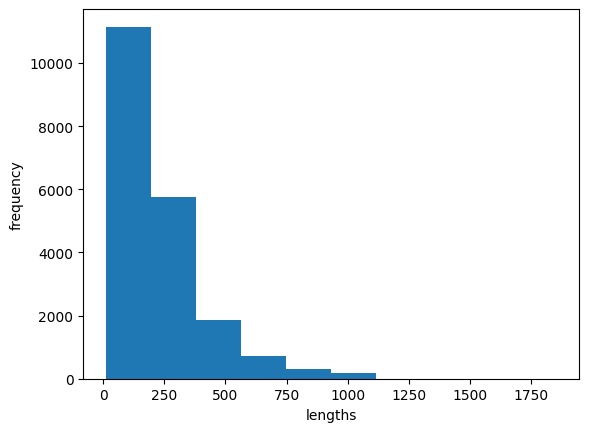

In [19]:
# 히스토그램으로 확인
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

# 대부분의 리뷰 길이는 굉장히 짧음. 길이가 긴 몇 리뷰가 있음.

In [20]:
# 대부분이 짧은 리뷰이므로, 우리는 리뷰에서 100개의 단어만 사용하기로 함
# 100개보다 짧은 리뷰는 패딩 추가.

# 패딩을 자동으로 추가해주는 함수
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100)

In [21]:
print(train_seq.shape)
# 행은 토큰별로, 열은 리뷰별로 구분된 2차원 배열 생성됨

(20000, 100)


In [23]:
print(train_seq[0])
# 이 리뷰는 패딩이 없으므로 100보다 길었을 것임
print(train_input[0][-10:])
# 뒷부분이 일치하는 것을 보니, 리뷰의 앞부분을 자른 것으로 예상

# 앞부분을 자르는 이유는 일반적으로 뒷부분의 정보가 더 유용하리라 기대하기 때문.

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [24]:
print(train_seq[5])

# 마찬가지로 패딩도 앞부분에 위치하는 것을 확인.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [25]:
val_seq = pad_sequences(val_input, maxlen= 100)

In [26]:
# 순환 신경망 생성
from tensorflow import keras
model = keras.Sequential()
# (100, 300) : 100은 리뷰의 길이, 300은 토큰의 개수
# 원 핫 인코딩을 사용하기 때문
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [27]:
# 원 핫 인코딩 배열 반환
train_oh = keras.utils.to_categorical(train_seq)

In [28]:
print(train_oh.shape)

(20000, 100, 300)


In [29]:
val_oh = keras.utils.to_categorical(val_seq)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64,  validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.7030 - accuracy: 0.4904 - val_loss: 0.7032 - val_accuracy: 0.4850
Epoch 2/100
 13/313 [>.............................] - ETA: 3s - loss: 0.6990 - accuracy: 0.5024

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.6982 - accuracy: 0.4972 - val_loss: 0.6989 - val_accuracy: 0.4868
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6950 - accuracy: 0.5066 - val_loss: 0.6959 - val_accuracy: 0.4974
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6924 - accuracy: 0.5196 - val_loss: 0.6934 - val_accuracy: 0.5068
Epoch 5/100
313/313 [==============================] - 5s 18ms/step - loss: 0.6896 - accuracy: 0.5342 - val_loss: 0.6903 - val_accuracy: 0.5238
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6848 - accuracy: 0.5576 - val_loss: 0.6836 - val_accuracy: 0.5528
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6685 - accuracy: 0.6010 - val_loss: 0.6547 - val_accuracy: 0.6222
Epoch 8/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6457 - accuracy: 0.6329 - val_loss: 0.6406 - val_accuracy: 0.6428
Epoc

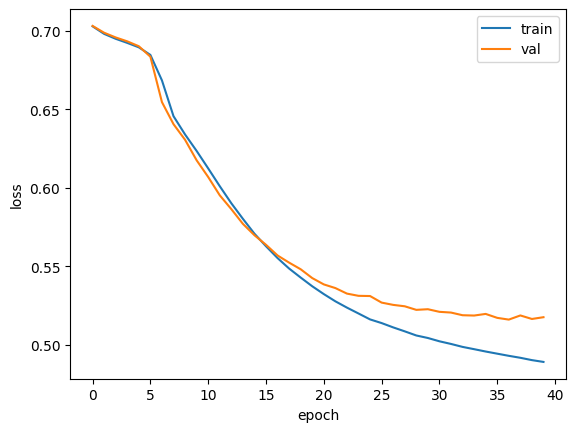

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [38]:
# 원 핫 인코딩은 입력 데이터가 너무 커지는 단점이 있음.
# 따라서 다른 방법이 필요함

# 단어 임베딩 : 각 단어를 고정된 크기의 실수 벡터로 바꾸어줌

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6901 - accuracy: 0.5313 - val_loss: 0.6766 - val_accuracy: 0.6014
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6619 - accuracy: 0.6370 - val_loss: 0.6502 - val_accuracy: 0.6608
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6382 - accuracy: 0.6765 - val_loss: 0.6304 - val_accuracy: 0.6894
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6145 - accuracy: 0.7025 - val_loss: 0.6028 - val_accuracy: 0.7140
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5920 - accuracy: 0.7204 - val_loss: 0.5813 - val_accuracy: 0.7254
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5733 - accuracy: 0.7328 - val_loss: 0.5673 - val_accuracy: 0.7292
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5595 - accuracy: 0.7410 - val_loss: 0.5554 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 16ms/step - loss: 0.5053 - accuracy: 0.7625 - val_loss: 0.5130 - val_accuracy: 0.7496
Epoch 16/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5023 - accuracy: 0.7639 - val_loss: 0.5109 - val_accuracy: 0.7528
Epoch 17/100
313/313 [==============================] - 5s 15ms/step - loss: 0.4998 - accuracy: 0.7663 - val_loss: 0.5113 - val_accuracy: 0.7534
Epoch 18/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4975 - accuracy: 0.7683 - val_loss: 0.5096 - val_accuracy: 0.7570
Epoch 19/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4958 - accuracy: 0.7674 - val_loss: 0.5101 - val_accuracy: 0.7550
Epoch 20/100
313/313 [==============================] - 5s 16ms/step - loss: 0.4947 - accuracy: 0.7681 - val_loss: 0.5084 - val_accuracy: 0.7512
Epoch 21/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4924 - accuracy: 0.7692 - val_loss: 0.5074 - val_accuracy: 0.750

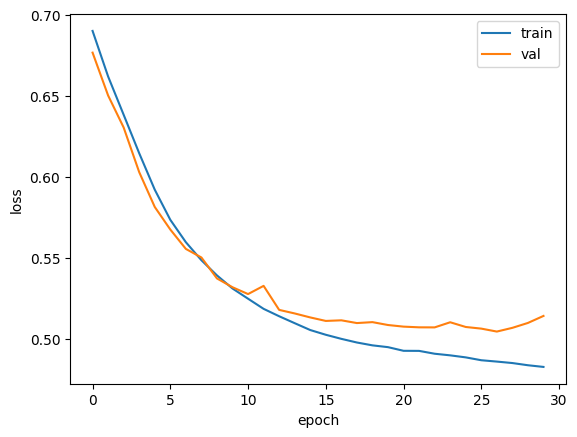

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
# 9-3 LSTM과 GRU 셀

In [43]:
# 고급 순환층인 LSTM과 GRU에 대해 알아보자
# 기본 순환층은 긴 시퀀스를 학습하기 어려움 ( 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문.)

In [1]:
# LSTM(long short- term memory) : 단기 기억을 오래 기억하기 위해 고안됨
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
# 패딩 추가
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen= 100)
val_seq = pad_sequences(val_input, maxlen= 100)


In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length= 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics= ['accuracy'])
ckeckpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history = model.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 28ms/step - loss: 0.6925 - accuracy: 0.5378 - val_loss: 0.6919 - val_accuracy: 0.5402
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6910 - accuracy: 0.5735 - val_loss: 0.6899 - val_accuracy: 0.5980
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6882 - accuracy: 0.6122 - val_loss: 0.6860 - val_accuracy: 0.6256
Epoch 4/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6822 - accuracy: 0.6370 - val_loss: 0.6774 - val_accuracy: 0.6488
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6678 - accuracy: 0.6646 - val_loss: 0.6543 - val_accuracy: 0.6832
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6195 - accuracy: 0.7052 - val_loss: 0.5867 - val_accuracy: 0.7122
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5692 - accuracy: 0.7269 - val_loss: 0.5622 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 8s 27ms/step - loss: 0.4897 - accuracy: 0.7799 - val_loss: 0.4915 - val_accuracy: 0.7758
Epoch 12/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4772 - accuracy: 0.7861 - val_loss: 0.4804 - val_accuracy: 0.7794
Epoch 13/100
313/313 [==============================] - 8s 27ms/step - loss: 0.4666 - accuracy: 0.7923 - val_loss: 0.4736 - val_accuracy: 0.7820
Epoch 14/100
313/313 [==============================] - 9s 28ms/step - loss: 0.4582 - accuracy: 0.7964 - val_loss: 0.4672 - val_accuracy: 0.7850
Epoch 15/100
313/313 [==============================] - 8s 27ms/step - loss: 0.4516 - accuracy: 0.8007 - val_loss: 0.4649 - val_accuracy: 0.7844
Epoch 16/100
313/313 [==============================] - 8s 25ms/step - loss: 0.4461 - accuracy: 0.8035 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 17/100
313/313 [==============================] - 8s 26ms/step - loss: 0.4413 - accuracy: 0.8053 - val_loss: 0.4569 - val_accuracy: 0.788

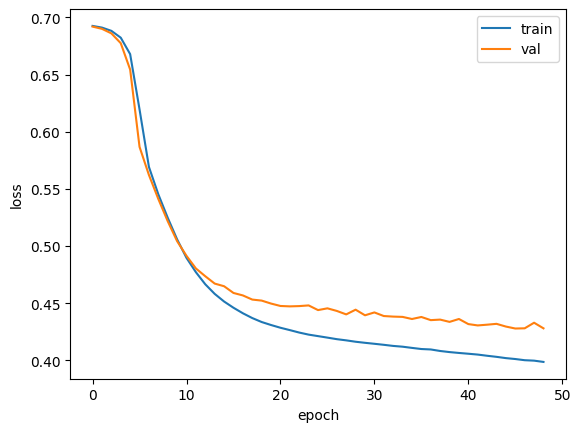

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
# 순환층에 드롭아웃 적용하기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics= ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_dropout_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 29ms/step - loss: 0.6927 - accuracy: 0.5299 - val_loss: 0.6922 - val_accuracy: 0.5770
Epoch 2/100
 22/313 [=>............................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5568

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 10ms/step - loss: 0.6915 - accuracy: 0.5742 - val_loss: 0.6906 - val_accuracy: 0.6062
Epoch 3/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6892 - accuracy: 0.6079 - val_loss: 0.6878 - val_accuracy: 0.6268
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6846 - accuracy: 0.6339 - val_loss: 0.6810 - val_accuracy: 0.6502
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6741 - accuracy: 0.6518 - val_loss: 0.6640 - val_accuracy: 0.6736
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6351 - accuracy: 0.6904 - val_loss: 0.5948 - val_accuracy: 0.7182
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5729 - accuracy: 0.7279 - val_loss: 0.5594 - val_accuracy: 0.7282
Epoch 8/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5491 - accuracy: 0.7432 - val_loss: 0.5404 - val_accuracy: 0.7436
Epoch 

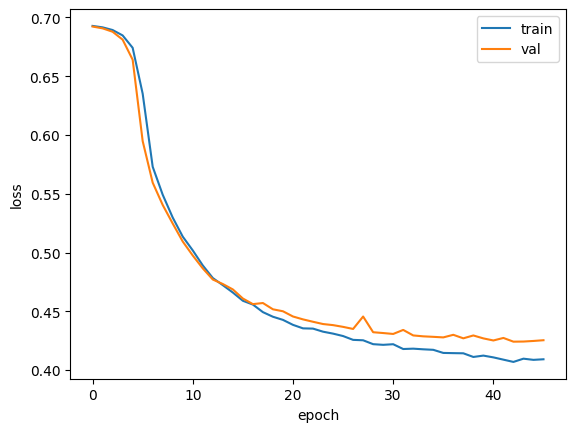

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합이 확실히 줄어듦을 확인.

In [8]:
# 두 개의 층 연결하기
# 순환층은 마지막 타임스텝의 은닉 상태를 출력하게 되어있는데, 연결된 순환층에선 마지막 순환층만 그렇게 설계해야함.
# 이전 순환층들은 모든 타임스텝의 은닉 상태를 출력해야 함.
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
# 중간 순환층에는 return_sequences = True 로 지정
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics= ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_2rnn_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 31ms/step - loss: 0.6924 - accuracy: 0.5361 - val_loss: 0.6914 - val_accuracy: 0.5872
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5440

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 0.6899 - accuracy: 0.5917 - val_loss: 0.6872 - val_accuracy: 0.6226
Epoch 3/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6799 - accuracy: 0.6359 - val_loss: 0.6674 - val_accuracy: 0.6600
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6342 - accuracy: 0.6795 - val_loss: 0.5892 - val_accuracy: 0.7006
Epoch 5/100
313/313 [==============================] - 5s 14ms/step - loss: 0.5611 - accuracy: 0.7193 - val_loss: 0.5350 - val_accuracy: 0.7368
Epoch 6/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5308 - accuracy: 0.7416 - val_loss: 0.5127 - val_accuracy: 0.7556
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5126 - accuracy: 0.7535 - val_loss: 0.4959 - val_accuracy: 0.7670
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.4962 - accuracy: 0.7660 - val_loss: 0.4863 - val_accuracy: 0.7718
Epoc

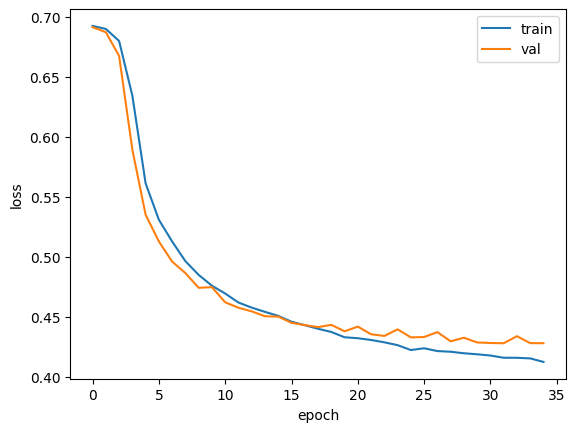

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 단일 층과 비슷한 효율이지만 과대적합은 확실히 줄어듦

In [13]:
# GRU : LSTM을 간소화한 버전
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss='binary_crossentropy', metrics= ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_gru_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights= True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size = 64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 24ms/step - loss: 0.6924 - accuracy: 0.5325 - val_loss: 0.6918 - val_accuracy: 0.5420
Epoch 2/100
 22/313 [=>............................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5795

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 11ms/step - loss: 0.6904 - accuracy: 0.5699 - val_loss: 0.6895 - val_accuracy: 0.5700
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6871 - accuracy: 0.5972 - val_loss: 0.6857 - val_accuracy: 0.5928
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6819 - accuracy: 0.6113 - val_loss: 0.6797 - val_accuracy: 0.6044
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6733 - accuracy: 0.6287 - val_loss: 0.6696 - val_accuracy: 0.6190
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6596 - accuracy: 0.6413 - val_loss: 0.6535 - val_accuracy: 0.6390
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6366 - accuracy: 0.6617 - val_loss: 0.6253 - val_accuracy: 0.6692
Epoch 8/100
313/313 [==============================] - 3s 9ms/step - loss: 0.5917 - accuracy: 0.6990 - val_loss: 0.5659 - val_accuracy: 0.7162
Epoch 9/

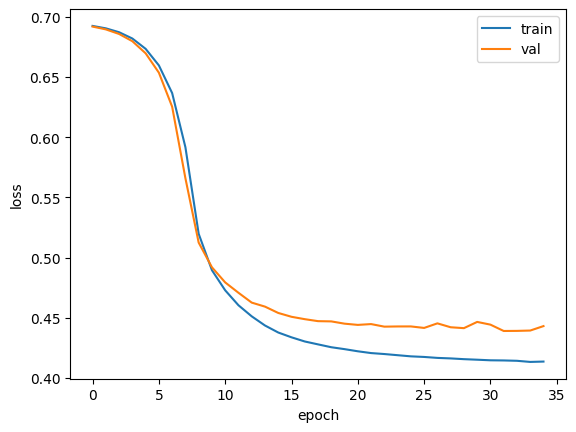

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()